# Assignment 3: Unsupervised Learning with k-Means Algorithm

Group members:
- Hiep Huynh
- Dinh Nguyen
- Dan Vu
- Duy Tran

This notebook demonstrates the implementation of the K-Means clustering algorithm. We will explore the steps involved, visualize the clusters, and use the Elbow Method to determine the optimal number of clusters.

**Part 1: Familiarization and Basic Testing with the k-Means Algorithm**

1.   ***Dataset Selection:***
Select an interesting dataset (other than Iris) from Kaggle on which you can perform k-means clustering. Since you will be doing clustering and not classification the dataset might be different than what you used for previous two assignments.
2.   ***Algorithm Application:***
Run the k-means algorithm on your dataset using the sklearn version.
3.   ***Use Cases:***
Identify two real-world applications for the k-means algorithm.

**Part 2: In-Depth Experimentation with the k-Means Algorithm**

1.   ***Parameter Tuning:***
Experiment with different values of k, using the Elbow method to help determine the optimal number of clusters.

### **Data Preprocessing**
In this assignment, we use Diabetes Predictive - the same dataset with previous two assignments.

In [48]:
pip install tabulate

In [49]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import tabulate
from tabulate import tabulate

#### **1. Load the Dataset**
We load the dataset into a pandas DataFrame for easier manipulation and visualization.

In [50]:
# Create a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/hiephamk/Data_Group_Project/main/diabetes_prediction_dataset.csv')

In [51]:
# View the first 5 rows
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### **2. Features Selection and Normalization**
We will take two columns `HbA1c_level`, `blood_glucose_level` to focus on clustering. These features are more discriminative for clustering.
We also keep the target column `diabetes` to compare the actual labels with clusters later. Then we:
*   Normalize both features to ensure one doesn't dominate clustering due to scale differences.
*   Visualize data to understand its distribution before applying K-Means algorithm.


In [52]:
# Select features
df = df[['HbA1c_level','blood_glucose_level', 'diabetes']]

In [53]:
# Normalize both features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(df)

In [54]:
# View the updated data frame
df.head(3)

,HbA1c_level,blood_glucose_level,diabetes
0,6.6,140,0
1,6.6,80,0
2,5.7,158,0


Text(0, 0.5, 'Blood Glucose Level')

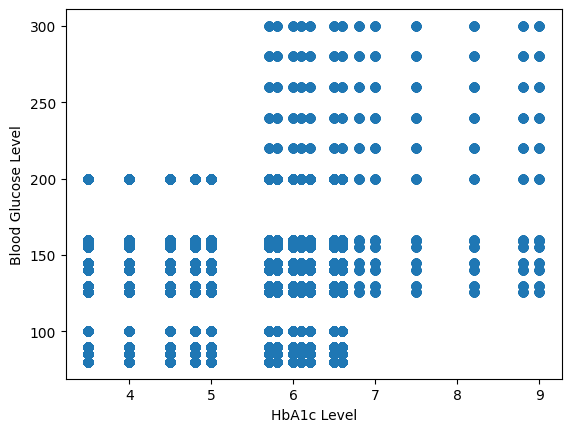

In [55]:
# Visualize data to understand its distribution
plt.scatter(df['HbA1c_level'], df['blood_glucose_level'])
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')

### **K-Means Algorithm Implementation**

#### **1. Apply K-Means Clustering**
Using the K-Means algorithm, we group the data into 3 clusters and predict cluster assignments.

In [56]:
# Apply k-means clustering with k=3 using normalized features
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(features_normalized)
y_predicted

array([0, 1, 0, ..., 0, 1, 1], dtype=int32)

#### **2. Verify Cluster Assignments**

In [57]:
print('Sample Cluster Labels (index 50-80):', y_predicted[50:80])

Sample Cluster Labels (index 50-80): [0 0 1 2 1 2 0 1 1 2 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1]


#### **3. Add Clusters to the DataFrame**
Add a `cluster` column to the DataFrame to analyze cluster assignments.

In [58]:
df['cluster'] = y_predicted
df.head()

,HbA1c_level,blood_glucose_level,diabetes,cluster
0,6.6,140,0,0
1,6.6,80,0,1
2,5.7,158,0,0
3,5.0,155,0,0
4,4.8,155,0,0


#### **4. Check Unique Clusters**
Verify the unique clusters created by the algorithm.

In [59]:
print("Unique Cluster:", df.cluster.unique())

Unique Cluster: [0 1 2]


#### **5. Analyze Cluster Center (normalized space)**
The cluster centers represent the average values of `HbA1c_level` and `blood_glucose_level` for each cluster. These centers can help interpret the clustering results.

In [60]:
centers = km.cluster_centers_

#### **6. Separate Clusters for Visualization**
Create separate DataFrames for each cluster to plot them individually.

In [61]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

#### **7. Visualize Clusters**
Visualize the clusters using a scatter plot with `HbA1c_level` and `blood_glucose_level` and their average values (centroids) to understand the grouping.

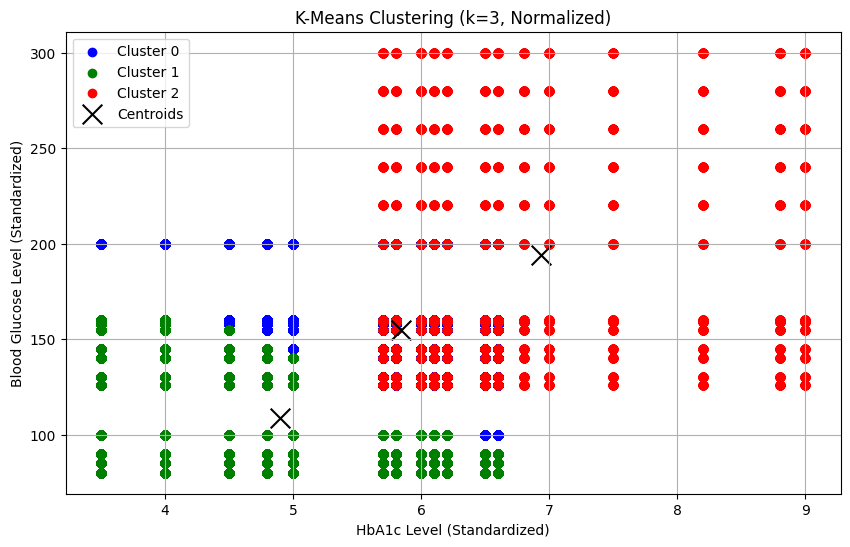

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['HbA1c_level'], df1['blood_glucose_level'], color='blue', label='Cluster 0')
plt.scatter(df2['HbA1c_level'], df2['blood_glucose_level'], color='green', label='Cluster 1')
plt.scatter(df3['HbA1c_level'], df3['blood_glucose_level'], color='red', label='Cluster 2')

# Transformed cluster centers back to original scale for clarity
centers_inverse = scaler.inverse_transform(km.cluster_centers_)
plt.scatter(centers_inverse[:, 0], centers_inverse[:, 1], color='black', marker='x', s=200, label='Centroids')

plt.xlabel('HbA1c Level (Standardized)')
plt.ylabel('Blood Glucose Level (Standardized)')
plt.legend()
plt.title('K-Means Clustering (k=3, Normalized)')
plt.grid(True)
plt.show()

### **Use Case Identification**

#### **1. Healthcare (Diabetes Prediction)**

K-Means clustering can be applied to segment patients based on their risk levels for diabetes. By clustering patients with similar HbA1c levels and blood glucose levels, healthcare professionals can identify groups at higher risk for diabetes and offer personalized care or preventive measures.

#### **2. E-commerce (Customer Segmentation)**

Retailers can use K-Means clustering to segment customers based on their buying behavior, browsing patterns, and other factors. This allows for targeted marketing, personalized product recommendations, and better inventory management.

### **Elbow Method for Optimal K**

The Elbow Method is used to determine the optimal number of clusters by evaluating the Sum of Squared Errors (SSE) for different values of `k`. The point where SSE starts to diminish significantly is considered the optimal `k`.

#### **1. Calculate Sum of Squared Errors (SSE)**

In [63]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#### **2. Plot Elbow Curve**
Visualize the SSE values for different numbers of clusters to identify the optimal `k`.

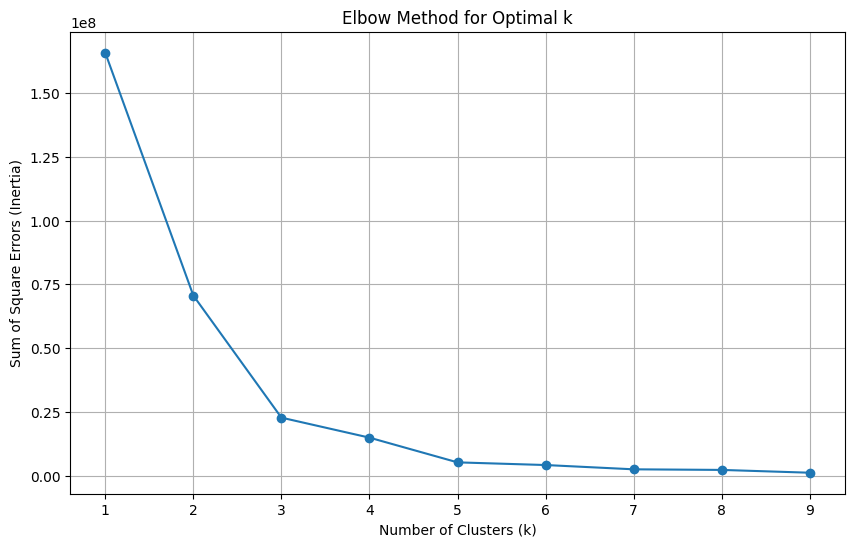

In [64]:
# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_rng, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Square Errors (Inertia)')
plt.grid(True)
plt.show()

The chart shows that the best optimal k value is 3.

#### **3. Analyze clusters with diabetes column**

In [65]:
cluster_analysis = df.groupby('cluster')['diabetes'].value_counts(normalize=True).unstack().fillna(0)
cluster_analysis.columns = ['No Diabetes (0)', 'Diabetes (1)']
cluster_analysis.index = ['Cluster 0', 'Cluster 1', 'Cluster 2']
print(tabulate(cluster_analysis, headers='keys', tablefmt='fancy_grid', showindex=True, floatfmt=".2f"))

╒═══════════╤═══════════════════╤════════════════╕
│           │   No Diabetes (0) │   Diabetes (1) │
╞═══════════╪═══════════════════╪════════════════╡
│ Cluster 0 │              1.00 │           0.00 │
├───────────┼───────────────────┼────────────────┤
│ Cluster 1 │              1.00 │           0.00 │
├───────────┼───────────────────┼────────────────┤
│ Cluster 2 │              0.00 │           1.00 │
╘═══════════╧═══════════════════╧════════════════╛


From the above table, we see that **clusters 0 and 1** only include non-diabetic individuals while **cluster 2** exclusively represents diabetics.

This demonstrates a significant distinction between clusters and diabetes status. This could show a strong link between blood glucose and HbA1c levels and diabetes diagnosis.